# Análise HCNSW nmslib

## Imports

In [1]:
from numpy import load
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

## Constantes e funções

In [2]:
DB_NAME = "gist"
METHOD_NAMES = ("hnsw", "hcnsw")

In [3]:
def get_mean_and_sd(values):
    mean = sum(values)/len(values)
    s2 = (sum((x-mean)**2 for x in values))/(len(values)-1)
    s = sqrt(s2)
    return mean, s

## Teste base (seed=0)

In [4]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    recalls[method_name] = load(f"data/{method_name}_{DB_NAME}_recalls.npy")
    deltas[method_name] = load(f"data/{method_name}_{DB_NAME}_deltas.npy")

In [5]:
table = []
for method_name in METHOD_NAMES:
    mean_recalls, s_recalls = get_mean_and_sd(recalls[method_name])
    mean_deltas, s_deltas = get_mean_and_sd(deltas[method_name])
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [6]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hnsw          0.925456  0.0686424        0.00181133  0.167318
hcnsw         0.925259  0.0685414        0.00181643  0.167307


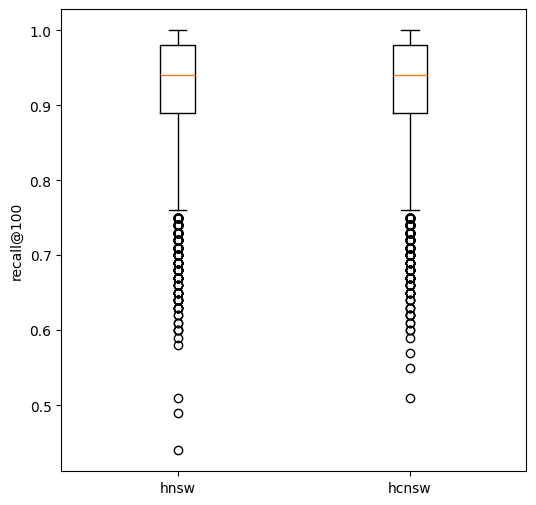

In [7]:
all_recalls = [recalls[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

## Variação de seeds (1 a 30)

In [4]:
SEED_RANGE = range(1, 31)

In [6]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_recalls.npy")
        deltas[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_deltas.npy")

In [7]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        table.append((method_name, seed, mean_recalls, s_recalls, mean_deltas, s_deltas, min(recalls[(method_name, seed)])))
table.sort(key=lambda row: row[2], reverse=True)

In [8]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "query time (s)", "SD", "min recall"]))

method      seed    recall@100        SD    query time (s)           SD    min recall
--------  ------  ------------  --------  ----------------  -----------  ------------
hnsw           3       0.69495  0.165047       0.0644456    2.01766              0.18
hnsw          10       0.69463  0.165631       0.057793     1.80939              0.21
hnsw          19       0.69454  0.164944       0.000578214  0.000132506          0.22
hnsw           5       0.6944   0.165603       0.000579206  0.000143026          0.24
hnsw           2       0.69434  0.165323       0.000706828  0.000810928          0.19
hnsw           8       0.69433  0.166238       0.000581186  0.00013007           0.2
hnsw          12       0.69424  0.165504       0.0575641    1.80227              0.21
hnsw          22       0.6941   0.165779       0.000564221  0.000121547          0.24
hnsw          28       0.69406  0.165857       0.000568349  0.000151063          0.21
hnsw           9       0.69402  0.165493       0.000656

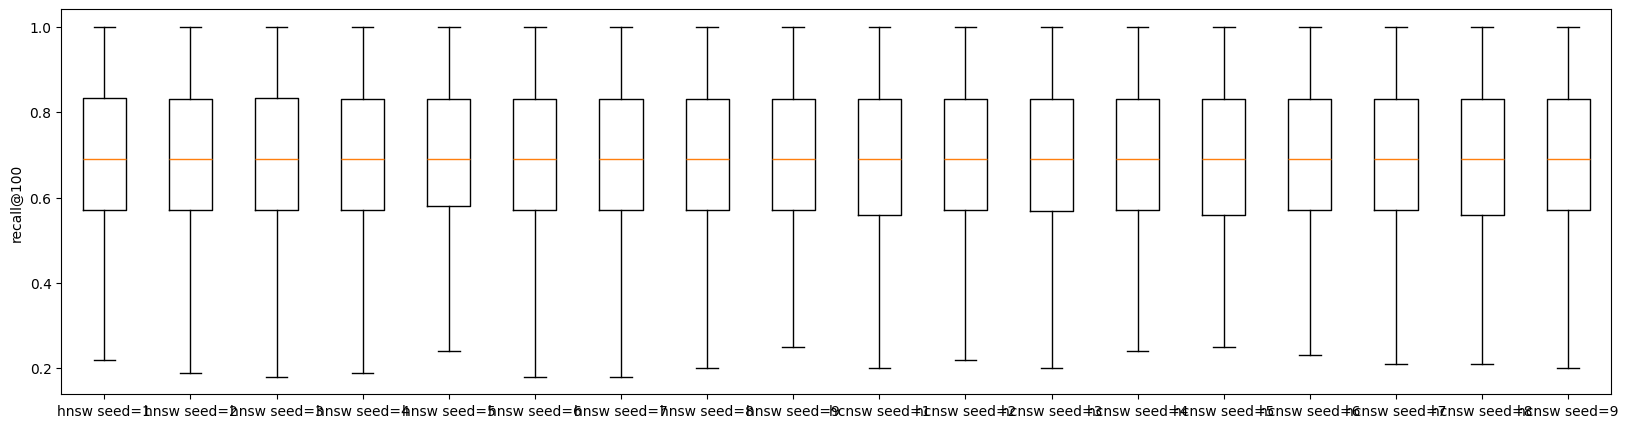

In [25]:
all_recalls = [recalls[(method_name, seed)] for method_name in METHOD_NAMES for seed in SEED_RANGE]

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=[f"{method_name} seed={seed}" for method_name in METHOD_NAMES for seed in SEED_RANGE])

plt.show()

In [47]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        method_recalls.append(mean_recalls)
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        method_deltas.append(mean_deltas)
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [48]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100           SD    query time (s)         SD
--------  ------------  -----------  ----------------  ---------
hnsw          0.693917  0.000796128        0.0154553   0.0268735
hcnsw         0.692718  0.000485239        0.00594635  0.0185135


In [9]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        method_recalls += list(recalls[(method_name, seed)])
        method_deltas += list(deltas[(method_name, seed)])
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [10]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100        SD    query time (s)        SD
--------  ------------  --------  ----------------  --------
hnsw          0.693601  0.166098        0.00653436  0.594203
hcnsw         0.692902  0.166559        0.00272035  0.370094


In [10]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        table.append((method_name, seed, mean_recalls, s_recalls, recalls_under_05, recalls_under_03))
table.sort(key=lambda row: row[2], reverse=True)
table.sort(key=lambda row: row[4])
table.sort(key=lambda row: row[5])

In [11]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "recalls < 0.5", "recalls < 0.3"]))

method      seed    recall@100         SD    recalls < 0.5    recalls < 0.3
--------  ------  ------------  ---------  ---------------  ---------------
hnsw          28      0.925691  0.0684381                0                0
hnsw          16      0.925633  0.0684686                0                0
hnsw          12      0.925596  0.0685545                0                0
hnsw          27      0.925576  0.0685274                0                0
hnsw          10      0.925557  0.0685031                0                0
hcnsw         12      0.925509  0.0686205                0                0
hnsw          24      0.925502  0.0687156                0                0
hcnsw         22      0.925488  0.0686115                0                0
hcnsw         29      0.925482  0.0686929                0                0
hcnsw         27      0.925475  0.0686722                0                0
hcnsw         11      0.925465  0.0687548                0                0
hcnsw       

In [11]:
table = []
for method_name in METHOD_NAMES:
    method_recalls_under_05 = []
    method_recalls_under_03 = []
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        method_recalls_under_05.append(recalls_under_05)
        method_recalls_under_03.append(recalls_under_03)
    mean_recalls_05, s_recalls_05 = get_mean_and_sd(method_recalls_under_05)
    mean_recalls_03, s_recalls_03 = get_mean_and_sd(method_recalls_under_03)
    table.append((method_name, mean_recalls_05, s_recalls_05, mean_recalls_03, s_recalls_03))
table.sort(key=lambda row: row[1])
table.sort(key=lambda row: row[3])

In [12]:
print(tabulate(table, headers=["method", "recalls < 0.5", "SD", "recalls < 0.3", "SD"]))

method      recalls < 0.5       SD    recalls < 0.3        SD
--------  ---------------  -------  ---------------  --------
hnsw              126.167  3.94866          4.8      0.886683
hcnsw             127.2    3.76371          5.53333  0.937102


In [13]:
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        for i, delta in enumerate(deltas[(method_name, seed)]):
            if delta < 0.00001:
                print(f"method={method_name} seed={seed} time={delta} recall={recalls[(method_name, seed)][i]}")